In [2]:
#import headers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
import pickle
from sklearn.externals import joblib
import time
import os




In [4]:
#import mnist dataset

#insert working directory here.
wd = '/home/rajesh/Downloads/mldata'
os.chdir(wd)
from scipy.io import loadmat
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

mnist_data.shape


(70000, 784)

In [33]:
#pre-processing
#pixel intensity values range from 0 to 255.
X_data = mnist_data/255.0
Y = mnist_label

In [34]:
X_data.shape

(70000, 784)

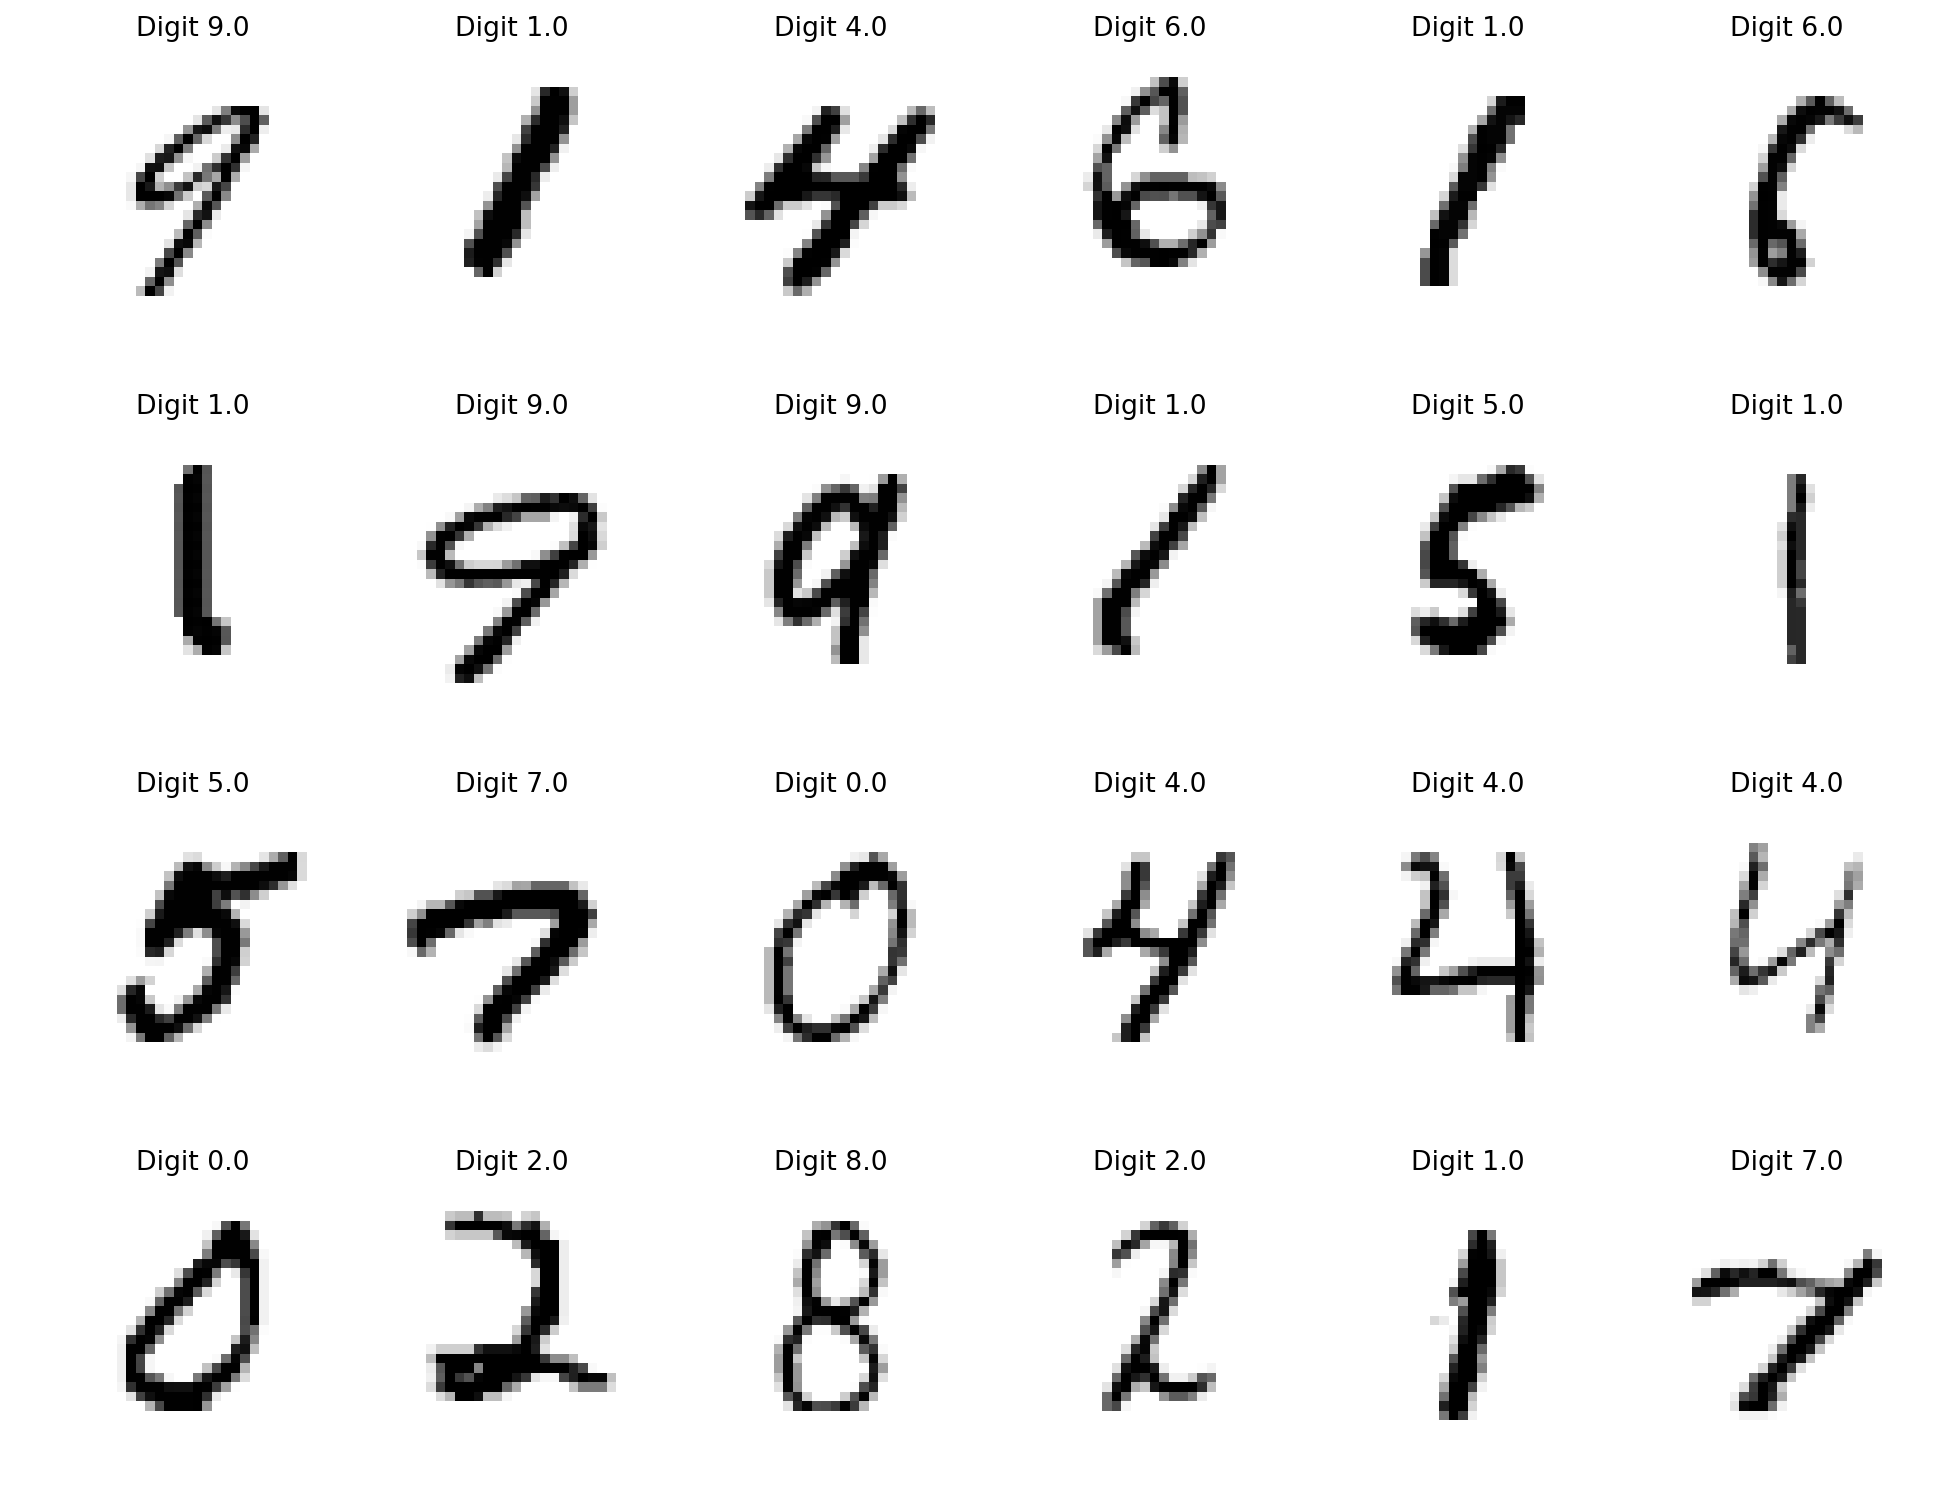

In [53]:
#Displying sample Digit Images by reshaping to 28x28

nsamples=24
rand_idx = np.random.choice(X_data.shape[0],nsamples)
images_and_labels = list(zip(X_data[rand_idx], Y[rand_idx]))


img = plt.figure(1, figsize=(15, 12), dpi=160)
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
    plt.axis('off')
    #each image is flat, we have to reshape to 2D array 28x28-784
    plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit {}'.format(label))
    
plt.show()
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.25, random_state=42)

X_test.shape



(17500, 784)

In [55]:

#classifier = svm.SVC(kernel='linear')
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

In [56]:
#save model as pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [50]:
#load model for later-use
loaded_model = joblib.load(filename)

In [45]:
predicted.shape

(17500,)

In [47]:
#print confusion matrix for linear svc
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[1629    0    8    2    3    8   13    2    9    3]
 [   0 1908    9    3    1    1    1    4    6    2]
 [   9   17 1653   19    8    6   11   15   24    5]
 [   6    8   33 1628    3   53    1    6   22    6]
 [   1    4   16    1 1611    2    4   10    6   36]
 [  10   11   12   62   13 1485   18    5   29    8]
 [  14    1   29    1   16   32 1656    0    5    0]
 [   5    4   31   11   21    2    1 1740    2   29]
 [   8   18   24   42   12   27    9    6 1545   11]
 [   6    5    9   20   46   16    0   48   16 1543]]


In [43]:
#print accuracy for linear svc
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9370285714285714

In [57]:
#print confusion matrix for rbf kernel
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[1630    0    8    2    4    9    8    1   11    4]
 [   0 1905    9    4    1    6    1    2    4    3]
 [   7   14 1646   11   19    9   17   14   25    5]
 [   3    8   26 1632    2   49    5   12   24    5]
 [   4    3    7    0 1621    1    6    5    5   39]
 [   8   12    9   51   19 1502   27    2   19    4]
 [  18    2   15    0    7   16 1691    0    5    0]
 [   4   10   20    5   23    3    0 1736    2   43]
 [   4   29   15   23   12   33   11    4 1555   16]
 [  10    6    9   26   47   12    0   42   17 1540]]


In [58]:
#print accuracy for rbf svc
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9404571428571429

In [65]:
from sklearn.decomposition import PCA
from time import time

n_components = 16
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


done in 4.437s


In [69]:
X_train_pca.shape

(52500, 16)

In [72]:
t0 = time()
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train_pca, y_train)
predicted = classifier.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

done in 60.598s


In [67]:
#print accuracy for rbf svc
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9689142857142857

In [70]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[1646    0    5    1    3    5    9    1    5    2]
 [   0 1916    9    4    0    0    1    2    2    1]
 [   5    5 1730    3    3    1    1    8   11    0]
 [   0    7   13 1694    1   19    0    9   19    4]
 [   1    1    0    1 1644    0    4    3    4   33]
 [   3    5    5   22    3 1582    8    2   17    6]
 [   9    2    2    1    7    8 1720    0    5    0]
 [   1    4   15    3    7    0    0 1791    6   19]
 [   0    9   17   11    8   15    4    0 1628   10]
 [   0    4    3   20   21   10    2   31   13 1605]]


In [ ]:
#parameter_tuning
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma,kernel='rbf')
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)